<font size="4"> <b> • DOMAIN: </b>Electronics and Telecommunication</font>

<font size="4"> <b> • CONTEXT: </b>A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

<font size="4"> <b> • DATA DESCRIPTION: </b>The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality
    

<font size="4"> <b> • PROJECT OBJECTIVE: </b> The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

<b>Steps and tasks:</b>
    
1. Import data. 
2. Data analysis & visualisation

*   Perform relevant and detailed statistical analysis on the data.
*   Perform relevant and detailed uni, bi and multi variate analysis
*   Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.
    
3. Design, train, tune and test a neural network regressor.

*  Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
    
4. Pickle the model for future use. </font>


<font size="5"><p style="color:black"> <b> 1. Import data:</p></font>

In [1]:
import pandas as pd
import io
from google.colab import files
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving Part- 1 - Signal.csv to Part- 1 - Signal.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Part- 1 - Signal.csv']))
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.size

19188

In [6]:
df.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1 Checking for Duplicate Indexes

In [7]:
df.index.is_unique

True

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2 Checking for Null/missing values

In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Signal_Strength,0,0.0
Parameter 11,0,0.0
Parameter 10,0,0.0
Parameter 9,0,0.0
Parameter 8,0,0.0
Parameter 7,0,0.0
Parameter 6,0,0.0
Parameter 5,0,0.0
Parameter 4,0,0.0
Parameter 3,0,0.0


In [9]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

<font size="5"><p style="color:black"> <b> 2. Data pre-processing and visualisation:

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if
required. Be highly experimental and analytical here to find relevant hidden patterns.</p></font>

<font size="4"> <b> 2.1 Perform relevant and detailed statistical analysis on the data </b> </font>

2.1.1 Mean

In [10]:
df.mean() 

Parameter 1         8.319637
Parameter 2         0.527821
Parameter 3         0.270976
Parameter 4         2.538806
Parameter 5         0.087467
Parameter 6        15.874922
Parameter 7        46.467792
Parameter 8         0.996747
Parameter 9         3.311113
Parameter 10        0.658149
Parameter 11       10.422983
Signal_Strength     5.636023
dtype: float64

2.1.2 Median

In [11]:
df.median() 

Parameter 1         7.90000
Parameter 2         0.52000
Parameter 3         0.26000
Parameter 4         2.20000
Parameter 5         0.07900
Parameter 6        14.00000
Parameter 7        38.00000
Parameter 8         0.99675
Parameter 9         3.31000
Parameter 10        0.62000
Parameter 11       10.20000
Signal_Strength     6.00000
dtype: float64

2.1.3 Mode

In [12]:
df.mode(axis=0, numeric_only = True).T 

,0
Parameter 1,7.2000
Parameter 2,0.6000
Parameter 3,0.0000
Parameter 4,2.0000
Parameter 5,0.0800
Parameter 6,6.0000
Parameter 7,28.0000
Parameter 8,0.9972
Parameter 9,3.3000
Parameter 10,0.6000


2.1.4 Five Summary Analysis with standard deviation, minimum, maximum, quantile (25%, 50%, 75%)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


2.1.5 Covariance

In [14]:
df.cov()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
Parameter 2,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
Parameter 3,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
Parameter 4,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
Parameter 5,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
Parameter 6,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
Parameter 7,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
Parameter 8,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
Parameter 9,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
Parameter 10,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


2.1.6 Correlation

In [15]:
df.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


2.1.7 Skewness

In [16]:
from scipy.stats import norm, kurtosis
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

2.1.8 Kurtosis

In [17]:
df.kurt(axis=0)

Parameter 1         1.132143
Parameter 2         1.225542
Parameter 3        -0.788998
Parameter 4        28.617595
Parameter 5        41.715787
Parameter 6         2.023562
Parameter 7         3.809824
Parameter 8         0.934079
Parameter 9         0.806943
Parameter 10       11.720251
Parameter 11        0.200029
Signal_Strength     0.296708
dtype: float64

2.1.9 Normalization of dataset

In [18]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
df1 = df.copy()
df1['Parameter 1'] = std_scale.fit_transform(df1[['Parameter 1']]) 
df1['Parameter 2'] = std_scale.fit_transform(df1[['Parameter 2']]) 
df1['Parameter 3'] = std_scale.fit_transform(df1[['Parameter 3']]) 
df1['Parameter 4'] = std_scale.fit_transform(df1[['Parameter 4']]) 
df1['Parameter 5'] = std_scale.fit_transform(df1[['Parameter 5']]) 
df1['Parameter 6'] = std_scale.fit_transform(df1[['Parameter 6']]) 
df1['Parameter 7'] = std_scale.fit_transform(df1[['Parameter 7']]) 
df1['Parameter 8'] = std_scale.fit_transform(df1[['Parameter 8']]) 
df1['Parameter 9'] = std_scale.fit_transform(df1[['Parameter 9']]) 
df1['Parameter 10'] = std_scale.fit_transform(df1[['Parameter 10']]) 
df1['Parameter 11'] = std_scale.fit_transform(df1[['Parameter 11']]) 
df1['Signal_Strength']  = std_scale.fit_transform(df1[['Signal_Strength']]) 
df1

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


<font size="4"> <b>2.2 Perform relevant and detailed uni, bi and multi variate analysis. </b> </font> 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.21 Univariate Analysis
   

1) Distplot before normalization 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


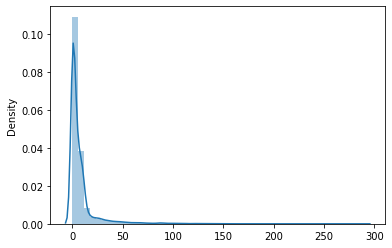

In [19]:
sns.distplot(df)

2) Distplot after normalization 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


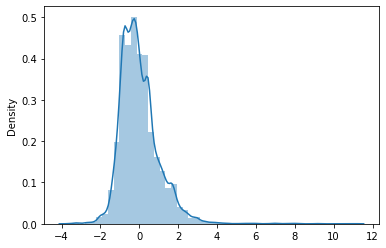

In [20]:
sns.distplot(df1)

3) Distplot for Skewness and Kurtosis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

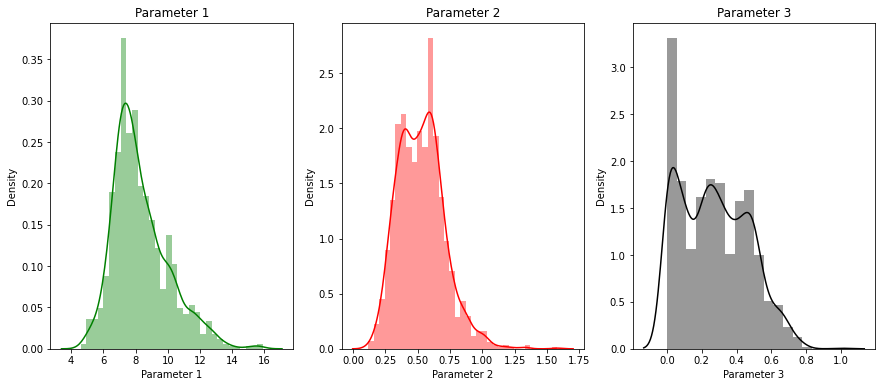

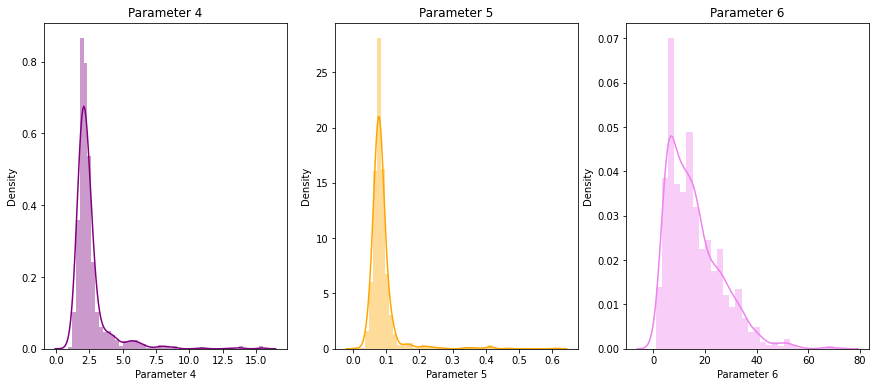

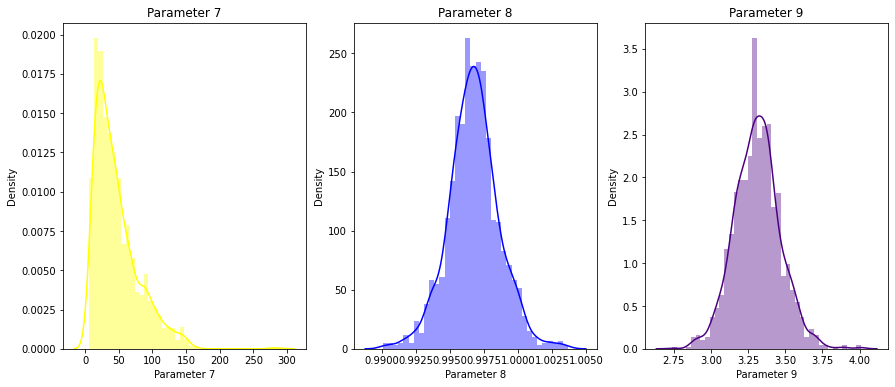

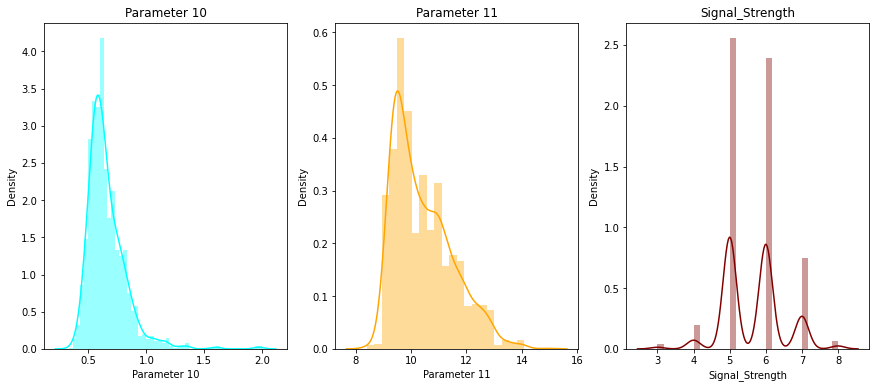

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 1')
sns.distplot(df['Parameter 1'],color='green')

plt.subplot(1, 4, 2)
plt.title('Parameter 2')
sns.distplot(df['Parameter 2'],color='red')

plt.subplot(1, 4, 3)
plt.title('Parameter 3')
sns.distplot(df['Parameter 3'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 4')
sns.distplot(df['Parameter 4'],color='purple')

plt.subplot(1, 4, 2)
plt.title('Parameter 5')
sns.distplot(df['Parameter 5'],color='orange')

plt.subplot(1, 4, 3)
plt.title('Parameter 6')
sns.distplot(df['Parameter 6'],color='violet')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 7')
sns.distplot(df['Parameter 7'],color='yellow')

plt.subplot(1, 4, 2)
plt.title('Parameter 8')
sns.distplot(df['Parameter 8'],color='blue')

plt.subplot(1, 4, 3)
plt.title('Parameter 9')
sns.distplot(df['Parameter 9'],color='indigo')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 10')
sns.distplot(df['Parameter 10'],color='cyan')

plt.subplot(1, 4, 2)
plt.title('Parameter 11')
sns.distplot(df['Parameter 11'],color='orange')

plt.subplot(1, 4, 3)
plt.title('Signal_Strength')
sns.distplot(df['Signal_Strength'],color='maroon')

From the above Plot, we can get a visual representation of the skewness and Kurtosis in the data.

Skewness is the distortion of symmetry and when skewness value between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.

*  Parameter 1        0.982751 (high skewness)
*  Parameter 2        0.671593 (moderate skewness)
*  Parameter 3        0.318337 (low skewness)
*  Parameter 4        4.540655 (very high skewness)
*  Parameter 5        5.680347 (very high skewness)
*  Parameter 6        1.250567 (high skewness)
*  Parameter 7        1.515531 (high skewness)
*  Parameter 8        0.071288 (very low skewness)
*  Parameter 9        0.193683 (low skewness)
*  Parameter 10       2.428672 (very high skewness)
*  Parameter 11       0.860829 (moderate skewness)
*  Signal_Strength    0.217802 (low skewness)

Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

*  Parameter 1         1.132143 (sharper peaks)
*  Parameter 2         1.225542 (sharper peaks)
*  Parameter 3        -0.788998 (flatter peaks)
*  Parameter 4        28.617595 (sharper peaks)
*  Parameter 5        41.715787 (sharper peaks)
*  Parameter 6         2.023562 (sharper peaks)
*  Parameter 7         3.809824 (sharper peaks)
*  Parameter 8         0.934079 (sharper peaks)
*  Parameter 9         0.806943 (sharper peaks)
*  Parameter 10       11.720251 (sharper peaks)
*  Parameter 11        0.200029 (flatter peaks)
*  Signal_Strength     0.296708 (flatter peaks)

4) Box Plot for outlier detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

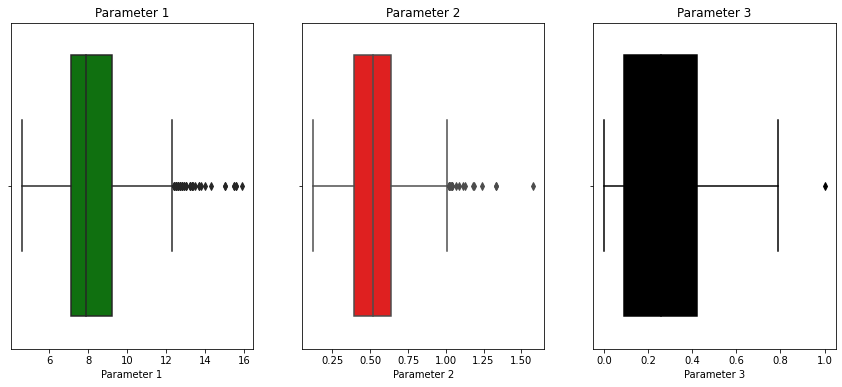

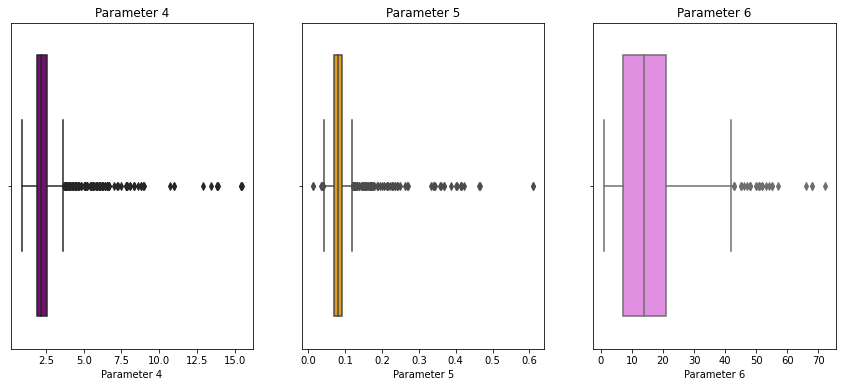

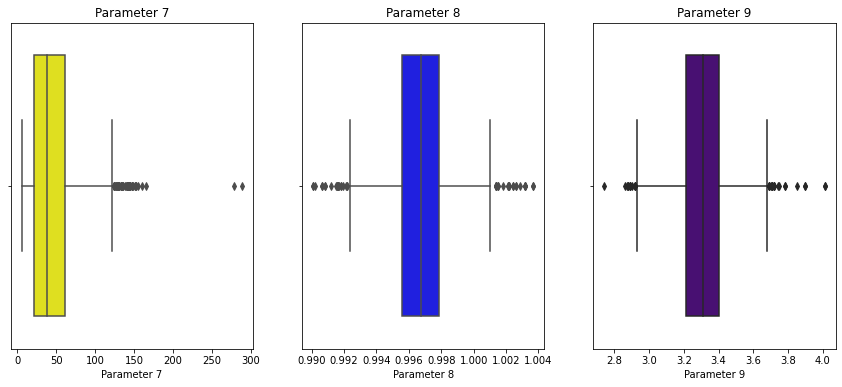

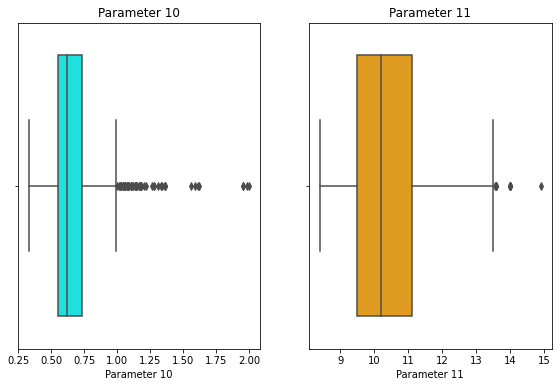

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 1')
sns.boxplot(df['Parameter 1'],color='green')

plt.subplot(1, 4, 2)
plt.title('Parameter 2')
sns.boxplot(df['Parameter 2'],color='red')

plt.subplot(1, 4, 3)
plt.title('Parameter 3')
sns.boxplot(df['Parameter 3'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 4')
sns.boxplot(df['Parameter 4'],color='purple')

plt.subplot(1, 4, 2)
plt.title('Parameter 5')
sns.boxplot(df['Parameter 5'],color='orange')

plt.subplot(1, 4, 3)
plt.title('Parameter 6')
sns.boxplot(df['Parameter 6'],color='violet')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 7')
sns.boxplot(df['Parameter 7'],color='yellow')

plt.subplot(1, 4, 2)
plt.title('Parameter 8')
sns.boxplot(df['Parameter 8'],color='blue')

plt.subplot(1, 4, 3)
plt.title('Parameter 9')
sns.boxplot(df['Parameter 9'],color='indigo')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 10')
sns.boxplot(df['Parameter 10'],color='cyan')

plt.subplot(1, 4, 2)
plt.title('Parameter 11')
sns.boxplot(df['Parameter 11'],color='orange')

In [23]:
# Finding the Interquartile Range for the Dataset
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1
IQR

Parameter 1         2.100000
Parameter 2         0.250000
Parameter 3         0.330000
Parameter 4         0.700000
Parameter 5         0.020000
Parameter 6        14.000000
Parameter 7        40.000000
Parameter 8         0.002235
Parameter 9         0.190000
Parameter 10        0.180000
Parameter 11        1.600000
Signal_Strength     1.000000
dtype: float64

In [24]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

Parameter 1         3.950000
Parameter 2         0.015000
Parameter 3        -0.405000
Parameter 4         0.850000
Parameter 5         0.040000
Parameter 6       -14.000000
Parameter 7       -38.000000
Parameter 8         0.992248
Parameter 9         2.925000
Parameter 10        0.280000
Parameter 11        7.100000
Signal_Strength     3.500000
dtype: float64

In [25]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

Parameter 1         12.350000
Parameter 2          1.015000
Parameter 3          0.915000
Parameter 4          3.650000
Parameter 5          0.120000
Parameter 6         42.000000
Parameter 7        122.000000
Parameter 8          1.001187
Parameter 9          3.685000
Parameter 10         1.000000
Parameter 11        13.500000
Signal_Strength      7.500000
dtype: float64

In [26]:
# Count of Outliers over the upper fence
countoutup =(df>Upperfence_inner).sum()
countoutup

Parameter 1         49
Parameter 2         19
Parameter 3          1
Parameter 4        155
Parameter 5        103
Parameter 6         30
Parameter 7         55
Parameter 8         24
Parameter 9         21
Parameter 10        59
Parameter 11        13
Signal_Strength     18
dtype: int64

In [27]:
# Count of Outliers below the lower fence
countoutdown =(df<Lowerfence_inner).sum()
countoutdown

Parameter 1         0
Parameter 2         0
Parameter 3         0
Parameter 4         0
Parameter 5         9
Parameter 6         0
Parameter 7         0
Parameter 8        21
Parameter 9        14
Parameter 10        0
Parameter 11        0
Signal_Strength    10
dtype: int64

In [28]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

Parameter 1         49
Parameter 2         19
Parameter 3          1
Parameter 4        155
Parameter 5        112
Parameter 6         30
Parameter 7         55
Parameter 8         45
Parameter 9         35
Parameter 10        59
Parameter 11        13
Signal_Strength     28
dtype: int64

Removing outliers from the dataset

In [29]:
# We can further remove the outliers for better clarity on the data
Doutlier = df.copy()
def remove_outliers(Doutlier, q=0.05):
    upper = Doutlier.quantile(1-q)
    lower = Doutlier.quantile(q)
    mask = (Doutlier < upper) & (Doutlier > lower)
    return mask
mask = remove_outliers(Doutlier, 0.1)
Doutlier = Doutlier[mask]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

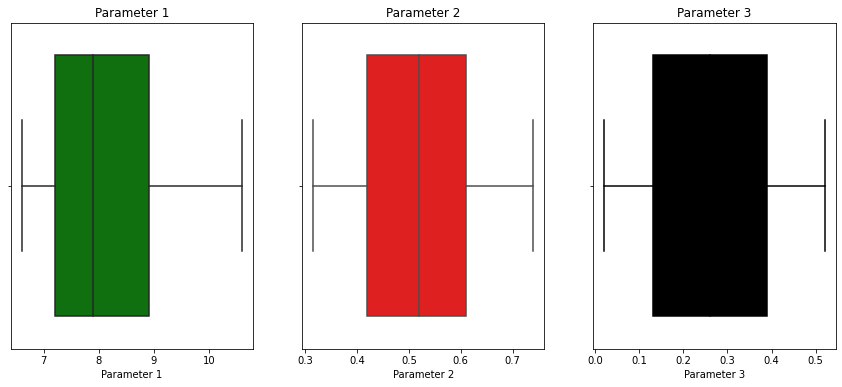

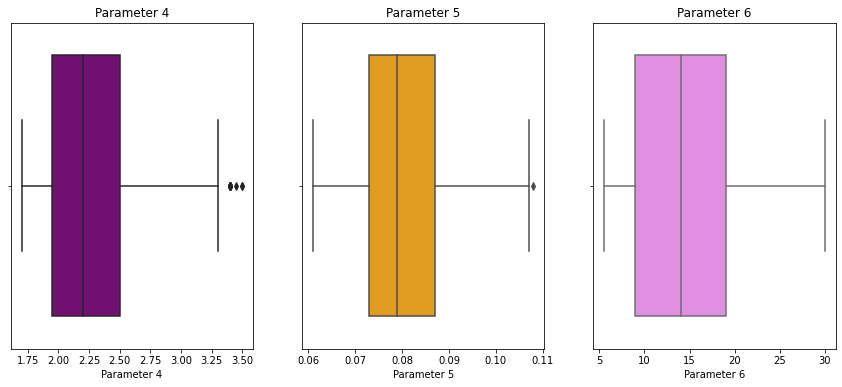

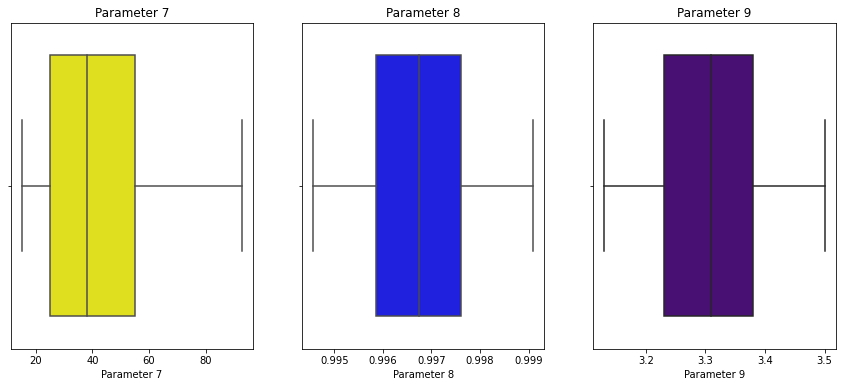

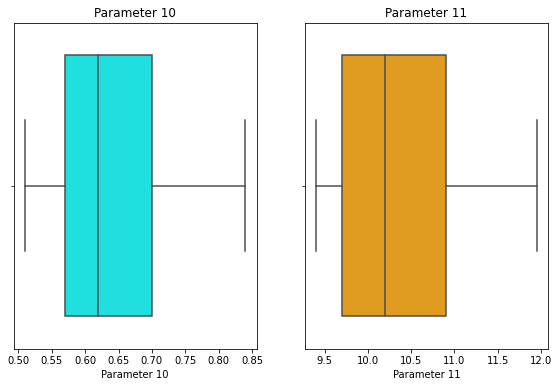

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 1')
sns.boxplot(Doutlier['Parameter 1'],color='green')

plt.subplot(1, 4, 2)
plt.title('Parameter 2')
sns.boxplot(Doutlier['Parameter 2'],color='red')

plt.subplot(1, 4, 3)
plt.title('Parameter 3')
sns.boxplot(Doutlier['Parameter 3'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 4')
sns.boxplot(Doutlier['Parameter 4'],color='purple')

plt.subplot(1, 4, 2)
plt.title('Parameter 5')
sns.boxplot(Doutlier['Parameter 5'],color='orange')

plt.subplot(1, 4, 3)
plt.title('Parameter 6')
sns.boxplot(Doutlier['Parameter 6'],color='violet')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 7')
sns.boxplot(Doutlier['Parameter 7'],color='yellow')

plt.subplot(1, 4, 2)
plt.title('Parameter 8')
sns.boxplot(Doutlier['Parameter 8'],color='blue')

plt.subplot(1, 4, 3)
plt.title('Parameter 9')
sns.boxplot(Doutlier['Parameter 9'],color='indigo')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Parameter 10')
sns.boxplot(Doutlier['Parameter 10'],color='cyan')

plt.subplot(1, 4, 2)
plt.title('Parameter 11')
sns.boxplot(Doutlier['Parameter 11'],color='orange')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.22 Bivariate, Multivariate Analysis
   

1) Correlation Heatmap

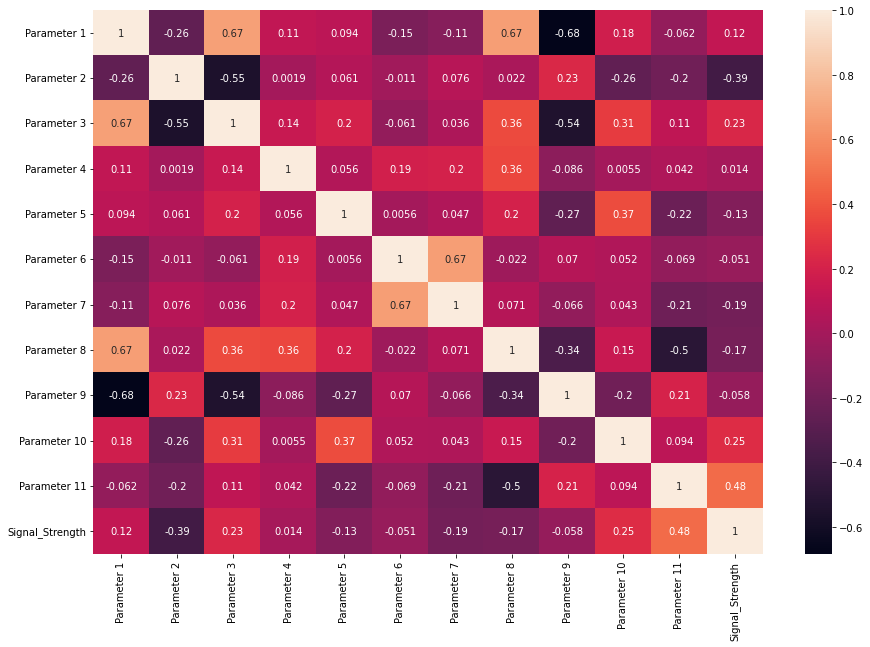

In [31]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

2) Correlation plot - Pairplot

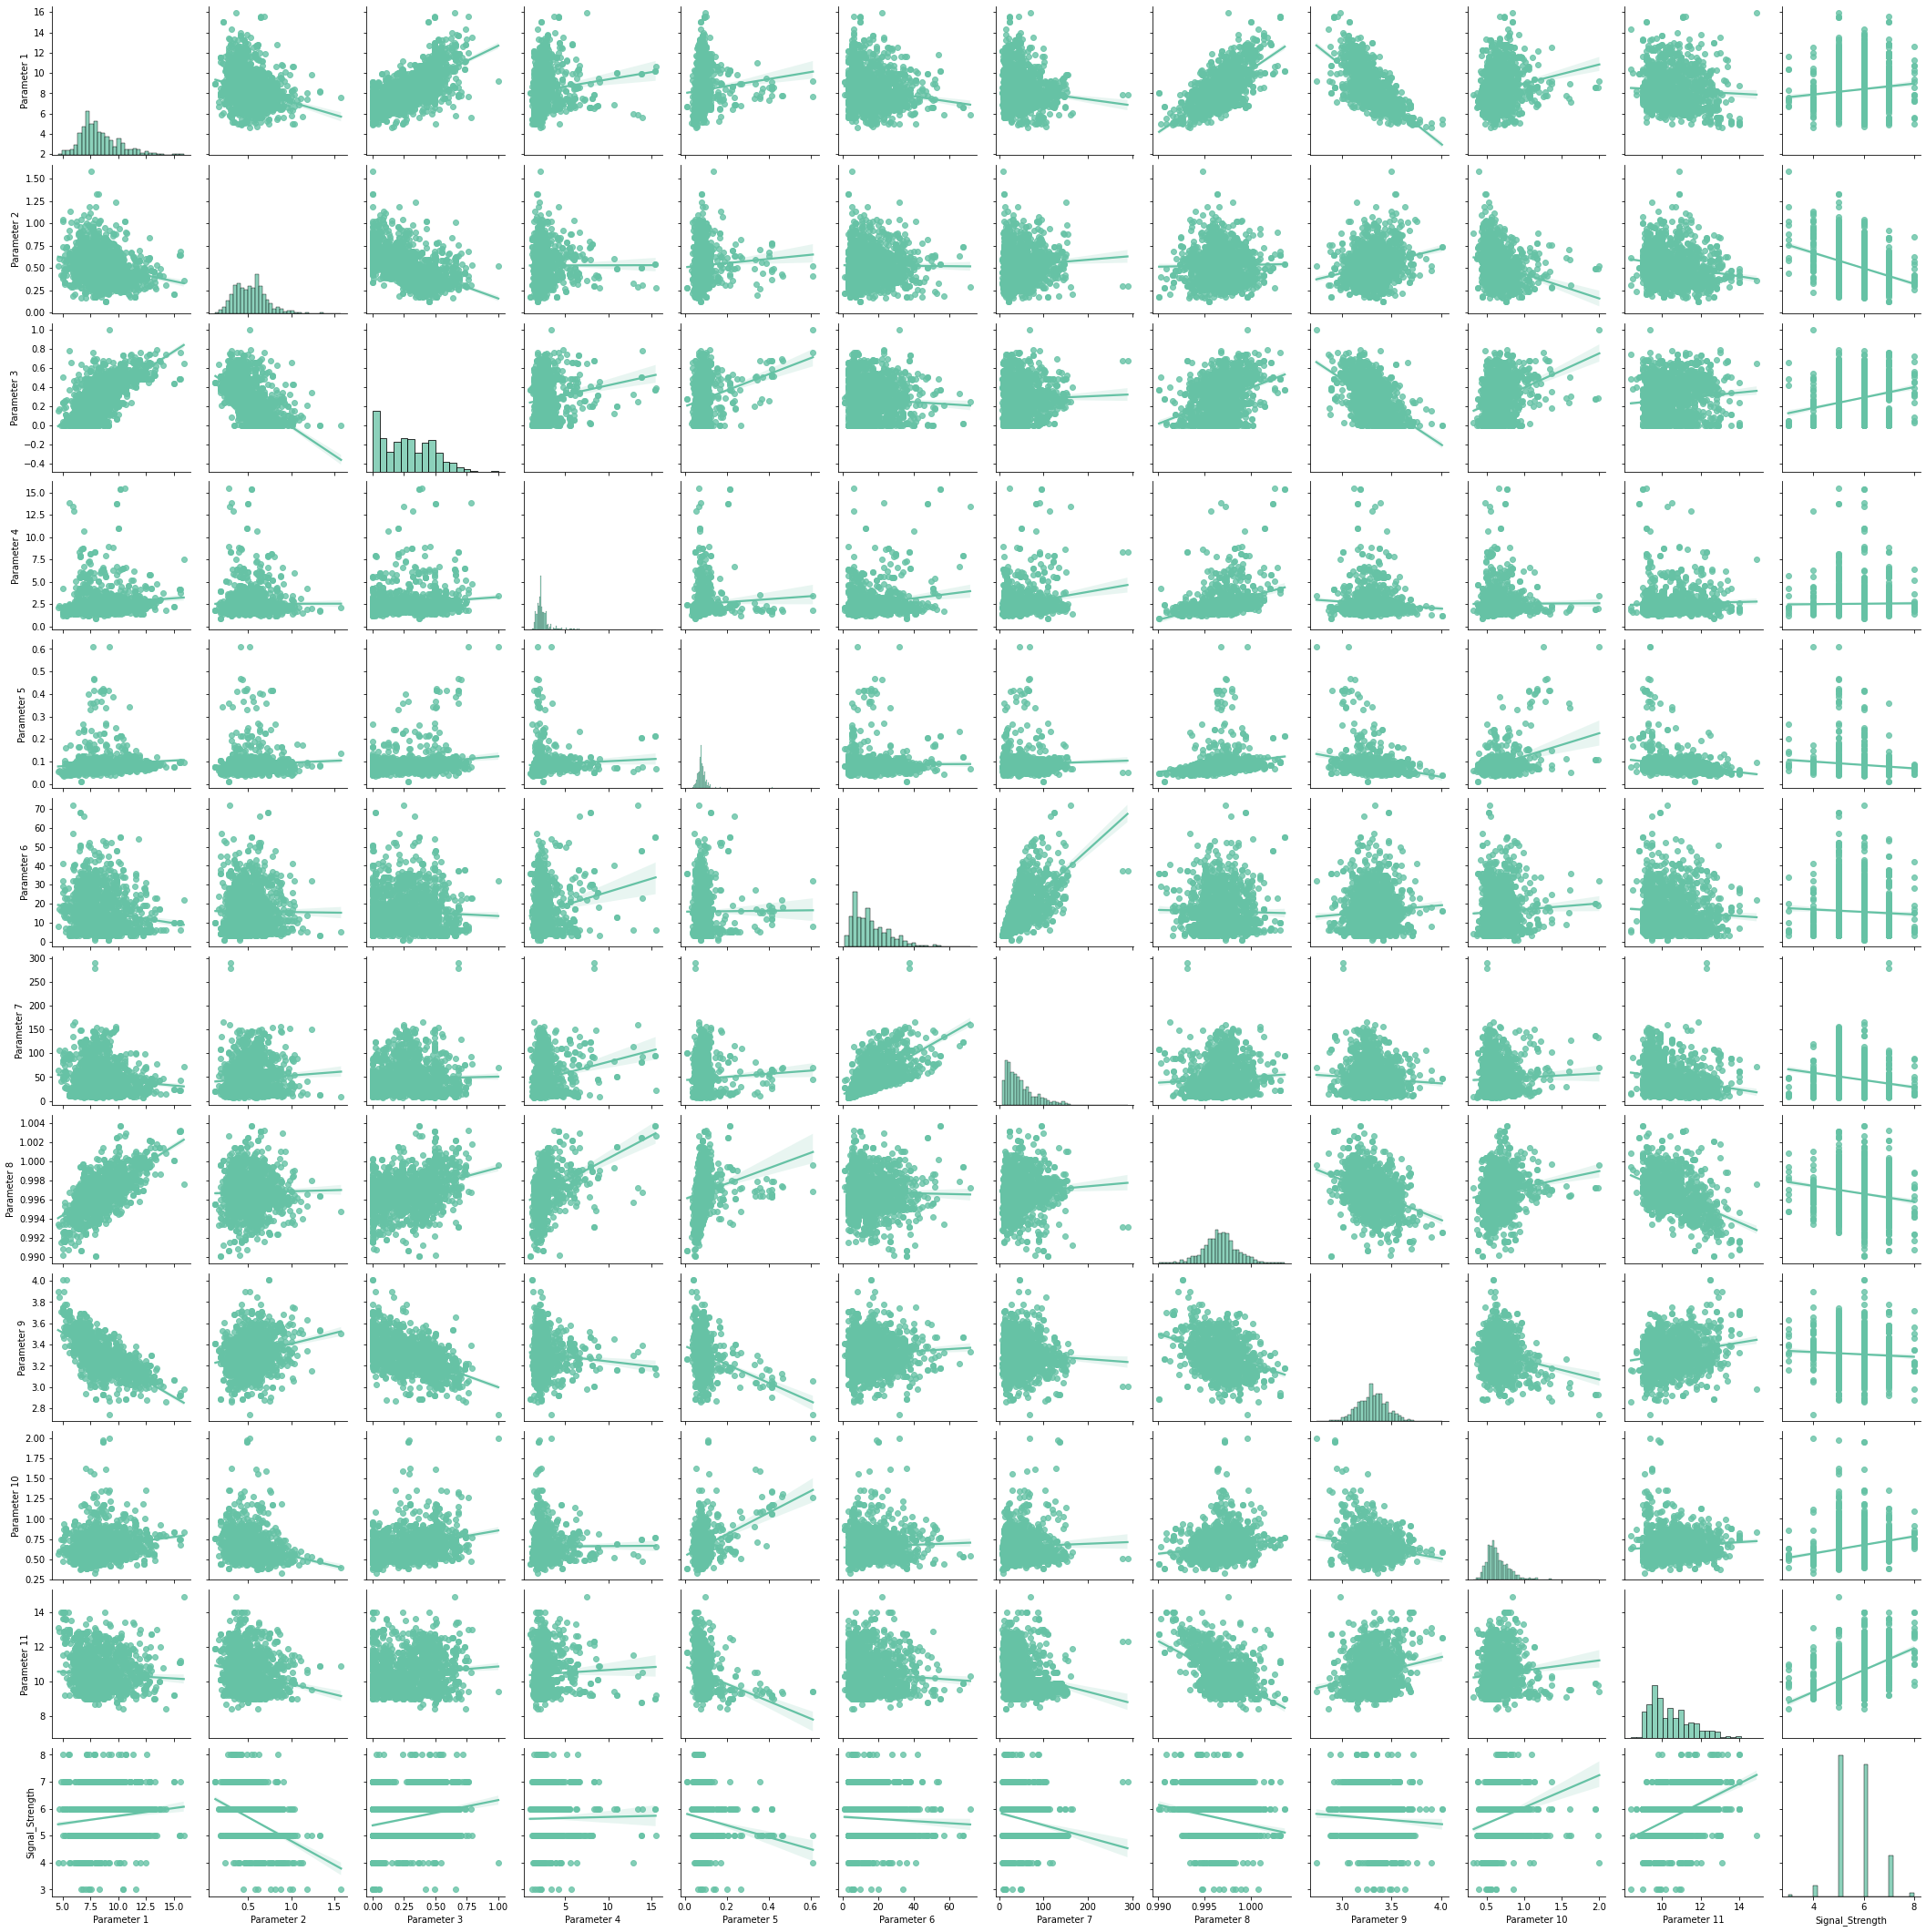

In [32]:
sns.pairplot(df, kind="reg") 
plt.show()

<font size="5"><p style="color:black"> <b> 3. Design, train, tune and test a neural network regressor.

Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.</p></font>

In [33]:
X = df.drop('Signal_Strength',axis=1)
y = df.Signal_Strength

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LeakyReLU
from tensorflow.keras import optimizers

In [38]:
model = Sequential()

# The Input Layer:
model.add(Dense(14, input_dim = X_train.shape[1]))
model.add(LeakyReLU(alpha=0.07))

# The Hidden Layers:
model.add(Dense(14))
model.add(LeakyReLU(alpha=0.07))

# Drop out layer part of hidden layer
model.add(Dropout(0.2))

model.add(Dense(14))
model.add(LeakyReLU(alpha=0.07))

# The Output Layer:
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.07))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14)                0         
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14)                0

In [39]:
model_fit=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 4.9682 - mse: 25.5527 - val_loss: 4.7231 - val_mse: 23.0033
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 4.3845 - mse: 20.2793 - val_loss: 4.0287 - val_mse: 17.0852
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 3.5278 - mse: 13.8629 - val_loss: 2.9406 - val_mse: 10.0532
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 2.4540 - mse: 7.8167 - val_loss: 1.8684 - val_mse: 4.9085
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8069 - mse: 4.8452 - val_loss: 1.5214 - val_mse: 3.6377
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6518 - mse: 4.3274 - val_loss: 1.3556 - val_mse: 2.9309
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5416 - mse: 3.6583 - val_loss: 1.2743 - val_mse: 2.5592
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 1.5

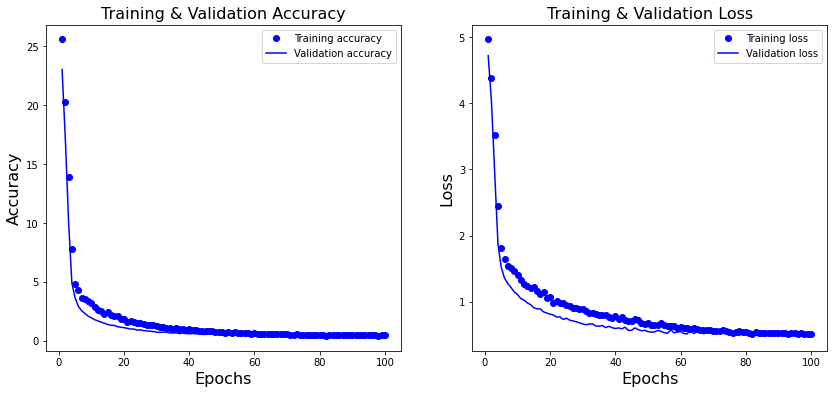

In [40]:
his_fit = model_fit.history
loss_values = model_fit.history['loss']
val_loss_values = model_fit.history['val_loss']
accuracy = his_fit['mse']
val_accuracy = his_fit['val_mse']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [41]:
y_pred = model.predict(X_test)

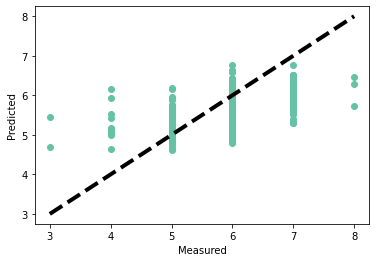

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
test_loss = model.evaluate(X_test, y_test)
print('test loss:',test_loss)

15/15 [==============================] - 0s 2ms/step - loss: 0.4802 - mse: 0.4187
test loss: [0.48017290234565735, 0.4187389612197876]


In [44]:
accuracy = 1 - test_loss[1]
print('Accuracy:',accuracy)

Accuracy: 0.5812610387802124


In [45]:
from sklearn.metrics import r2_score

score_r = r2_score(y_test,y_pred)
print(score_r)

0.26742307314959046


* The above model has accuracy of 55.88% and MSE of 44.11%. The Training loss is much higher than the Validation loss even after drop out dimensionality reduction. 



<font size="5"><p style="color:black"> <b>4. Pickle the model for future use. </p> </font>


In [46]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Regressor_model_json = model.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(Regressor_model_json)
# Pickle weights to HDF5
model.save_weights("Regressor_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Regressor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Regressor_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['mse'])
score = loaded_model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("Accuracy:","{:.2f}".format((1 - score[1])*100),'%')

Saved model to disk
Loaded model from disk
mse: 41.87%
Accuracy: 58.13 %
